In [1]:
import pandas as pd
import seaborn as sns
import os
import glob
import matplotlib.pyplot as plt

In [11]:
output_file = "../../../results/plots/wiki_marvinlinzen_model_overview_with_stdeviation.png"
files = glob.glob('../../../results/results_wiki1xv*_MARVINLINZEN_by_clause/*_wiki_seed100.txt')

In [3]:
currentdf = pd.read_csv(files[0])
currentdf = currentdf.drop(['group'], axis=1).mean()
currentdf = currentdf.to_frame('f1')
currentdf = currentdf.reset_index().rename(columns={'index':'layer'})
currentdf['model'] = 'bert'
currentdf

,layer,f1,model
0,1,0.403248,bert
1,2,0.402050,bert
2,3,0.407529,bert
3,4,0.432766,bert
4,5,0.438874,bert
5,6,0.473340,bert
6,7,0.504755,bert
7,8,0.570309,bert
8,9,0.623534,bert
9,10,0.607224,bert


In [6]:
dfs = []
for i, f in enumerate(files):
    name = None
    parts = os.path.basename(f).split('_')

    if 'xlnet' in parts:
        name = '-'.join(parts[:2])
    else:
        name = parts[0].split('-')[0]

    currentdf = pd.read_csv(f)
    currentdf = currentdf.drop(['group'], axis=1).mean()
    currentdf = currentdf.to_frame('f1')
    currentdf = currentdf.reset_index().rename(columns={'index':'layer'})
    currentdf['model'] = name

    dfs.append(currentdf)
    
len(dfs)

30

In [7]:
dfs[1]

,layer,f1,model
0,1,0.422747,electra
1,2,0.457511,electra
2,3,0.463783,electra
3,4,0.497919,electra
4,5,0.480320,electra
5,6,0.499399,electra
6,7,0.700135,electra
7,8,0.830122,electra
8,9,0.873842,electra
9,10,0.892222,electra


In [8]:
modeldf = pd.concat(dfs, axis=0)
modeldf = modeldf.reset_index().drop(['index'], axis=1)
modeldf = modeldf.sort_values(by=['model', 'layer'])
modeldf = modeldf.astype({'layer':'int32'})
modeldf.head()


,layer,f1,model
0,1,0.387741,bert
72,1,0.386486,bert
144,1,0.405548,bert
216,1,0.390305,bert
288,1,0.403248,bert


In [9]:
modeldf['model'].unique()

array(['bert', 'electra', 'gpt2', 'roberta', 'xlnet-bi', 'xlnet-uni'],
      dtype=object)

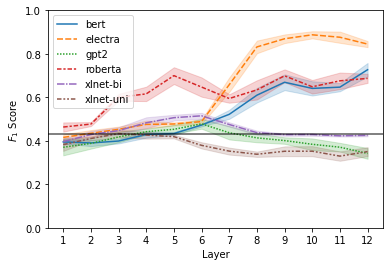

In [8]:
# dashed lines
dash_list = sns._core.unique_dashes(modeldf['model'].unique().size+1)
style = {key:value for key,value in zip(modeldf['model'].unique(), dash_list)}

# plot
myplot = sns.lineplot(data=modeldf, x='layer', y='f1', hue='model', style='model', dashes=style, ci='sd')
plt.xticks(sorted(set(modeldf.layer.values)))

myplot.axhline(0.43, color=(0, 0, 0, 0.65))

# set x- and y-axis labels
myplot.set_ylabel('$F_{1}$ Score')
myplot.set_xlabel('Layer')

# set y-axis min/max
myplot.set(ylim=(0, 1))

# remove legend title
myplot.get_legend().set_title(None)

In [12]:
fig = myplot.get_figure()
fig.savefig(output_file, bbox_inches="tight", dpi=300)